# Student Guide to Missingness Analysis Algorithms

## 🎯 What Is Missingness Analysis Really About?

Imagine you're conducting a survey about people's income and lifestyle habits. You notice something strange: wealthy people often skip the "income" question, teenagers frequently don't answer questions about alcohol consumption, and people with health issues avoid questions about exercise. These aren't random omissions - there are **patterns** in what's missing!

Missingness analysis is the detective work of understanding **why** data is missing and **how** those missing patterns might affect your analysis. It's not just about counting blanks - it's about uncovering the hidden stories that missing data tells.

---

## 🔍 The Three Fundamental Types of Missingness

Before diving into algorithms, we need to understand the philosophical foundation: **Why is data missing?**

### 🎲 **MCAR: Missing Completely At Random**
**The Idea**: Missing data is like a coin flip - completely random, unrelated to anything.

**Real Examples**:
- **Survey responses lost due to server crashes** (truly random technical failures)
- **Laboratory samples contaminated randomly** (equipment malfunction)
- **Random subset of questionnaires lost in mail**

**Mathematical Formalization**: 
$$P(\text{Missing} | \text{Observed data, Unobserved data}) = P(\text{Missing})$$

**Think of it like this**: Whether data is missing doesn't depend on the data itself - it's pure bad luck.

### 🎯 **MAR: Missing At Random (Conditional)**
**The Idea**: Missing data depends on observed information, but not on the missing values themselves.

**Real Examples**:
- **Men less likely to answer questions about emotions** (depends on observed gender)
- **Older people skip technology questions** (depends on observed age)
- **Higher education → more likely to complete surveys** (depends on observed education)

**Mathematical Formalization**:
$$P(\text{Missing} | \text{Observed data, Unobserved data}) = P(\text{Missing} | \text{Observed data})$$

**Think of it like this**: "I can predict who won't answer based on what I can see about them."

### ⚠️ **MNAR: Missing Not At Random**
**The Idea**: Missing data depends on the unobserved values themselves - the most dangerous type!

**Real Examples**:
- **High earners refuse to disclose income** (missing depends on the income value itself)
- **Severely depressed patients drop out of mental health studies** (missing depends on unobserved severity)
- **Poor students avoid reporting grades** (missing depends on the grade value)

**Mathematical Formalization**:
$$P(\text{Missing} | \text{Observed data, Unobserved data}) \neq P(\text{Missing} | \text{Observed data})$$

**Think of it like this**: "The reason it's missing IS the information I wanted!"

---

## 📊 Part 1: Basic Missingness Rate Analysis

### 🎯 **Simple Missing Rate Calculation**

**The Algorithm**: For each variable, calculate what fraction of values are missing.

**Mathematical Foundation**:
$$\text{Missing Rate}_j = \frac{\sum_{i=1}^n I(\text{missing}_{ij})}{n}$$

where $I(\text{missing}_{ij})$ is an indicator function (1 if missing, 0 if present).

**Think of it like this**: "What percentage of people didn't answer each question?"

**Example - Survey Analysis**:
```
Income question: 40% missing     ← High missingness, investigate why
Age question: 2% missing        ← Normal, probably just oversight  
Name question: 0% missing       ← Required field, no missingness
Phone number: 25% missing       ← Moderate, privacy concerns?
```

**Interpretation Guidelines**:
- **< 5%**: Generally not problematic
- **5-15%**: Potentially concerning, investigate patterns
- **15-30%**: Serious concern, may bias results
- **> 30%**: Major problem, question data quality

---

## 🕸️ Part 2: Missingness Correlation Analysis

### 🔗 **Understanding Co-Missingness Patterns**

**The Question**: Do variables tend to be missing together?

**The Algorithm**: Create a binary "missingness matrix" where 1 = missing, 0 = present, then compute correlations between these binary vectors.

**Mathematical Foundation**:
Let $M_{ij} = 1$ if value is missing for observation $i$ and variable $j$, 0 otherwise.

$$\rho_{kl} = \frac{\sum_i (M_{ik} - \bar{M}_k)(M_{il} - \bar{M}_l)}{\sqrt{\sum_i (M_{ik} - \bar{M}_k)^2 \sum_i (M_{il} - \bar{M}_l)^2}}$$

**Interpretation**:
- **High positive correlation (0.7-1.0)**: Variables tend to be missing together
- **Low correlation (0-0.3)**: Variables missing independently  
- **Negative correlation**: When one is missing, the other tends to be present

**Real Example - Medical Records**:
```
Blood_Pressure ↔ Heart_Rate: r = 0.85    ← Missing together (same test)
Income ↔ Education: r = 0.60              ← Missing together (privacy concerns)
Age ↔ Blood_Pressure: r = 0.02            ← Missing independently
```

**Why This Matters**: 
- **High correlations** suggest **systematic patterns** (equipment failure, survey design issues)
- **Can guide imputation strategies** (if variables missing together, impute together)

---

## 🎯 Part 3: Jaccard Similarity for Missingness Patterns

### 💎 **The Jaccard Index: Set Similarity for Missing Data**

**The Problem**: Correlation measures linear relationships, but missingness is binary. We need a measure designed for sets.

**The Core Idea**: Treat each variable's missing data pattern as a set. How similar are these sets?

**Mathematical Foundation**:
$$J(A,B) = \frac{|A \cap B|}{|A \cup B|} = \frac{\text{Both missing}}{\text{Either missing}}$$

**The Algorithm**:
1. **For each pair of variables**: Count observations where both are missing (intersection)
2. **Count observations** where at least one is missing (union)
3. **Compute ratio**: intersection ÷ union

**Example Calculation**:
```
Variable A missing: Observations {1, 3, 5, 7, 9}     (5 observations)
Variable B missing: Observations {1, 3, 8, 10}       (4 observations)

Intersection (both missing): {1, 3}                   (2 observations)
Union (either missing): {1, 3, 5, 7, 8, 9, 10}      (7 observations)

Jaccard = 2/7 ≈ 0.29
```

**Interpretation Scale**:
- **J = 1.0**: Perfect overlap (always missing together)
- **J = 0.5**: Moderate overlap
- **J = 0.0**: No overlap (never missing together)

**Why Jaccard vs. Correlation?**
- **Jaccard**: "How often do they miss together vs. miss separately?"
- **Correlation**: "Do their missing patterns tend to move together?"

**Real Application - E-commerce Data**:
```
Credit_Card ↔ Billing_Address: J = 0.95    ← Almost always missing together
Age ↔ Income: J = 0.45                     ← Sometimes missing together  
Product_Rating ↔ Purchase_Date: J = 0.02   ← Independent missingness
```

---

## 🌳 Part 4: Clustering Features by Missingness Patterns

### 🎯 **Hierarchical Clustering with Hamming Distance**

**The Goal**: Group variables that have similar missingness patterns.

**The Approach**: 
1. **Represent each variable** as a binary vector (1 = missing, 0 = present)
2. **Calculate distances** between these vectors using Hamming distance
3. **Apply hierarchical clustering** to group similar patterns

**Mathematical Foundation**:

**Hamming Distance**: Count positions where vectors differ
$$d_H(x,y) = \sum_{i=1}^n |x_i - y_i|$$

For proportional distance (0-1 scale):
$$d_H^{norm}(x,y) = \frac{1}{n}\sum_{i=1}^n |x_i - y_i|$$

**Example Calculation**:
```
Variable A: [1, 0, 1, 0, 1]  (missing at positions 1, 3, 5)
Variable B: [1, 0, 0, 0, 1]  (missing at positions 1, 5)
Variable C: [0, 1, 1, 1, 0]  (missing at positions 2, 3, 4)

Hamming Distance:
d(A,B) = |1-1| + |0-0| + |1-0| + |0-0| + |1-1| = 1
d(A,C) = |1-0| + |0-1| + |1-1| + |0-1| + |1-0| = 4
d(B,C) = |1-0| + |0-1| + |0-1| + |0-1| + |1-0| = 5

Clustering Result: {A,B} cluster together (distance 1), C separate (distances 4,5)
```

**Clustering Algorithm**: 
1. **Start with each variable** as its own cluster
2. **Repeatedly merge** the two closest clusters
3. **Continue until** desired number of clusters

**Interpretation**:
- **Variables in same cluster**: Similar missingness patterns (same causes?)
- **Variables in different clusters**: Different missingness mechanisms

**Real Example - Healthcare Data**:
```
Cluster 1: {Blood_Pressure, Heart_Rate, Weight}           ← Physical exam variables
Cluster 2: {Income, Education, Employment}                ← Socioeconomic variables  
Cluster 3: {Lab_Test_A, Lab_Test_B, Lab_Test_C}          ← Laboratory variables
```

**Why This Matters**:
- **Guides imputation strategies**: Variables in same cluster might be imputed together
- **Reveals data collection issues**: Clusters might reflect systematic problems
- **Informs analysis approach**: Different clusters might need different handling

---

## ⚠️ Part 5: MNAR Detection Algorithms

### 🔍 **The Challenge of Detecting MNAR**

**The Fundamental Problem**: MNAR depends on unobserved values, so we can never definitively prove it. We can only find **evidence** that suggests it.

**The Strategy**: Look for relationships between missingness patterns and available information (target variables) that suggest the missing values themselves drive the missingness.

### 📊 **For Continuous Targets: Statistical Tests**

#### **🎯 Welch's T-Test: Mean Differences**

**The Question**: Do people with missing data have different target values than people with complete data?

**Mathematical Foundation**:
- **Group 1**: Target values where feature is missing
- **Group 2**: Target values where feature is present
- **Null hypothesis**: Both groups have same mean
- **Test statistic**: Welch's t-test (unequal variances assumed)

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

**Example - Income Survey**:
```
People who disclosed income: Average age = 35
People who didn't disclose income: Average age = 55

T-test p-value < 0.05 → Significant difference!
Interpretation: Older people more likely to hide income (potential MNAR)
```

#### **🌊 Kolmogorov-Smirnov Test: Distribution Differences**

**The Question**: Do the two groups have completely different distributions (not just different means)?

**The Algorithm**:
1. **Create cumulative distribution functions** for both groups
2. **Find maximum difference** between the CDFs
3. **Test if difference** is larger than expected by chance

**Mathematical Foundation**:
$$D = \max_x |F_1(x) - F_2(x)|$$

where $F_1(x)$ and $F_2(x)$ are the empirical CDFs.

**Why Use Both Tests?**
- **T-test**: Detects mean differences (location shifts)
- **KS-test**: Detects any distributional differences (shape, scale, location)

#### **🎯 Logistic Regression AUC: Predictive Power**

**The Question**: How well can the target variable predict who will have missing data?

**The Algorithm**:
1. **Create binary outcome**: 1 = missing, 0 = present
2. **Train logistic regression**: Predict missingness from target
3. **Calculate AUC**: How well does target predict missingness?

**Mathematical Foundation**:
$$P(\text{Missing}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot \text{Target})}}$$

**AUC Interpretation**:
- **AUC = 0.5**: Target can't predict missingness (random)
- **AUC > 0.7**: Target strongly predicts missingness (potential MNAR!)
- **AUC > 0.8**: Very strong evidence of MNAR

**Example - Medical Study**:
```
Outcome: Depression score (higher = more depressed)
Missing: Dropout from study

AUC = 0.82 → People with higher depression scores much more likely to drop out
Interpretation: Strong MNAR evidence (sickest people leave study)
```

### 📊 **For Categorical Targets: Association Tests**

#### **🎲 Chi-Square Test: Independence Testing**

**The Question**: Is missingness independent of the target categories?

**The Setup**: Create a contingency table:
```
                 Target Category A    Target Category B    Target Category C
Missing = No            n11                n12                n13
Missing = Yes           n21                n22                n23
```

**Mathematical Foundation**:
$$\chi^2 = \sum_{i,j} \frac{(O_{ij} - E_{ij})^2}{E_{ij}}$$

where $E_{ij} = \frac{\text{row}_i \times \text{col}_j}{n}$ are expected frequencies under independence.

**Example - Education Survey**:
```
                High School    College    Graduate
Complete Data       100         150        50     (300 total)
Missing Data         50          30        20     (100 total)

Chi-square test p < 0.05 → Missingness depends on education level!
Interpretation: Different education levels have different response rates
```

#### **📏 Cramér's V: Effect Size**

**The Problem**: Chi-square tells us *if* there's association, but not *how strong*.

**Mathematical Foundation**:
$$V = \sqrt{\frac{\chi^2}{n \times \min(r-1, c-1)}}$$

where $r$ = rows, $c$ = columns, $n$ = total observations.

**Interpretation Scale**:
- **V = 0**: No association
- **V = 0.1**: Small effect  
- **V = 0.3**: Medium effect
- **V = 0.5**: Large effect

#### **🔗 Mutual Information: Nonlinear Dependencies**

**The Advantage**: Captures nonlinear relationships that chi-square might miss.

**Mathematical Foundation**:
$$I(X;Y) = \sum_{x,y} p(x,y) \log\frac{p(x,y)}{p(x)p(y)}$$

**Think of it like this**: "How much does knowing the target reduce my uncertainty about missingness?"

---

## 🎯 Part 6: Putting It All Together - The MNAR Detection Pipeline

### 🔍 **The Algorithmic Strategy**

```
For each variable with missing data:
    
    If target is continuous:
        1. Run t-test: Do missing vs. present groups have different means?
        2. Run KS-test: Do they have different distributions?
        3. Train logistic regression: Can target predict missingness?
        4. Calculate AUC: How well does it predict?
        
        If (p_ttest < 0.05) OR (p_ks < 0.05) OR (AUC > 0.7):
            Flag as potential MNAR
    
    If target is categorical:
        1. Build contingency table: Missingness × Target categories
        2. Run chi-square test: Are they independent?
        3. Calculate Cramér's V: How strong is the association?
        4. Calculate mutual information: Any nonlinear dependencies?
        
        If (p_chi2 < 0.05) OR (V > 0.1) OR (MI > 0.05):
            Flag as potential MNAR
```

### 🚨 **Threshold Justifications**

**Why AUC > 0.7?**
- **0.5-0.6**: Poor prediction (likely random)
- **0.6-0.7**: Fair prediction (weak evidence)
- **0.7-0.8**: Good prediction (moderate evidence) ← Our threshold
- **0.8-0.9**: Excellent prediction (strong evidence)

**Why Cramér's V > 0.1?**
- **0.1**: Small but meaningful effect size in social sciences
- **Conservative threshold**: Avoids flagging trivial associations
- **Practical significance**: Large enough to potentially bias analyses

**Why p < 0.05?**
- **Standard statistical significance level**
- **5% false positive rate** when null hypothesis is true
- **Balance**: Not too strict (miss real effects) or too lenient (too many false alarms)

---

## 💡 Part 7: Real-World Applications & Examples

### 🏥 **Medical Research Example**

**Dataset**: Clinical trial for depression treatment
**Variables**: Age, Income, Baseline depression score, Treatment outcome
**Missing**: 30% of participants dropped out before final assessment

**Analysis Results**:
```
Dropout vs. Baseline Depression:
- T-test p = 0.001 (those who dropped out had higher baseline scores)
- AUC = 0.78 (baseline score strongly predicts dropout)
- Conclusion: Strong MNAR evidence

Dropout vs. Age: 
- T-test p = 0.45 (no age difference)
- AUC = 0.52 (age doesn't predict dropout)
- Conclusion: Age missingness likely MAR or MCAR

Dropout vs. Income:
- Chi-square p = 0.03 (income categories differ)
- Cramér's V = 0.15 (moderate association)
- Conclusion: Moderate MNAR evidence
```

**Implications**: 
- **Baseline depression**: MNAR mechanism (sickest patients drop out)
- **Age**: Can be ignored or easily imputed
- **Income**: Moderate concern, consider sensitivity analysis

### 💰 **Financial Survey Example**

**Dataset**: Household financial survey
**Variables**: Age, Education, Income, Debt, Investment behavior
**Missing**: Income missing for 25% of respondents

**Analysis Results**:
```
Income Missingness vs. Education:
- Chi-square p = 0.001 
- Pattern: Higher education → MORE likely to skip income questions
- Cramér's V = 0.22 (large effect)
- Interpretation: Privacy concerns in educated populations

Income Missingness vs. Debt:
- T-test p = 0.03
- Pattern: People with higher debt more likely to skip income
- AUC = 0.65 (moderate prediction)
- Interpretation: Embarrassment/privacy mechanism
```

**Implications**:
- **Simple imputation inappropriate** (systematic bias)
- **Need sensitivity analysis** or specialized MNAR methods
- **Consider external data sources** for validation

---

## 🎯 Part 8: Common Misconceptions & Pitfalls

### 🚫 **"Missing = Random" Assumption**
**Wrong thinking**: "I'll just ignore missing data or use simple imputation"
**Reality**: Missingness patterns can severely bias your results if not properly handled
**Solution**: Always analyze missingness patterns before proceeding

### 🚫 **"MNAR is Untestable" Fatalism**  
**Wrong thinking**: "Since we can't prove MNAR, we can't do anything about it"
**Reality**: We can find evidence and conduct sensitivity analyses
**Solution**: Use multiple approaches and test robustness of conclusions

### 🚫 **"High Missingness = Bad Data" Fallacy**
**Wrong thinking**: "This variable has 40% missing data, so it's useless"
**Reality**: High missingness might be informative if it's MNAR
**Solution**: Analyze the pattern - sometimes the missingness IS the signal

### 🚫 **"One Test is Enough" Simplification**
**Wrong thinking**: "The t-test was significant, so it's definitely MNAR"
**Reality**: Multiple lines of evidence are needed for robust conclusions
**Solution**: Use triangulation - multiple tests pointing to same conclusion

### 🚫 **"Correlation = Causation" in Missingness**
**Wrong thinking**: "Missingness correlates with outcome, so missingness causes the outcome"
**Reality**: Both might be caused by a third factor
**Solution**: Consider confounding variables and alternative explanations

---

## 🎪 Summary: Your Missingness Analysis Toolkit

### 🏆 **The Essential Algorithm Hierarchy**

**🥇 Level 1 - Basic Screening:**
- Missing rates by variable
- Missingness correlation matrix
- Visual patterns (heatmaps, missing data plots)

**🥈 Level 2 - Pattern Analysis:**
- Jaccard similarity coefficients
- Hierarchical clustering of missingness patterns
- Co-missingness network analysis

**🥉 Level 3 - MNAR Detection:**
- Statistical tests (t-test, KS-test, chi-square)
- Predictive modeling (logistic regression AUC)
- Effect size measures (Cramér's V, mutual information)

### 🎯 **The Golden Rules**

1. **🔍 Always analyze before imputing** - Understand patterns first
2. **🎵 Use multiple tests** - Triangulate evidence from different approaches
3. **⚖️ Consider domain knowledge** - Statistical tests + subject matter expertise
4. **🔄 Test sensitivity** - How do different missingness assumptions affect conclusions?
5. **📊 Document everything** - Future users need to understand your assumptions

### 🚀 **Advanced Insights**

- **Pattern analysis reveals data collection issues** - Systematic problems leave fingerprints
- **MNAR detection is detective work** - Look for clues, build cumulative evidence
- **Missingness can be informative** - Sometimes what's missing tells you more than what's present
- **Domain knowledge is crucial** - Statistical tests provide evidence, but context provides interpretation

*Remember: Missingness analysis is fundamentally about understanding the data generation process. The algorithms provide the tools, but understanding why people don't respond, why sensors fail, or why systems crash requires domain expertise combined with statistical rigor!* 🎯✨

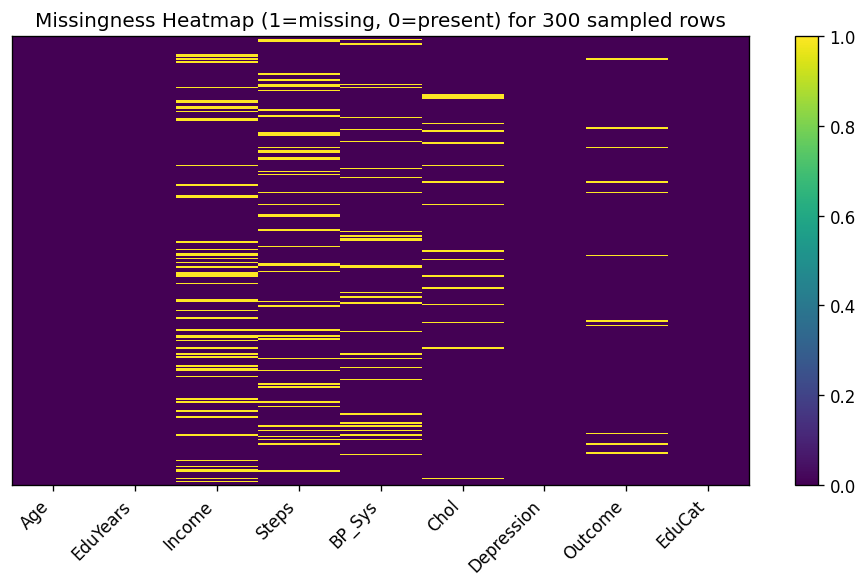

--- Missing rates by column ---
       Column  MissingRate
0      Income     0.164000
1       Steps     0.118000
2      BP_Sys     0.108000
3        Chol     0.042000
4     Outcome     0.028667
5         Age     0.000000
6    EduYears     0.000000
7  Depression     0.000000
8      EduCat     0.000000


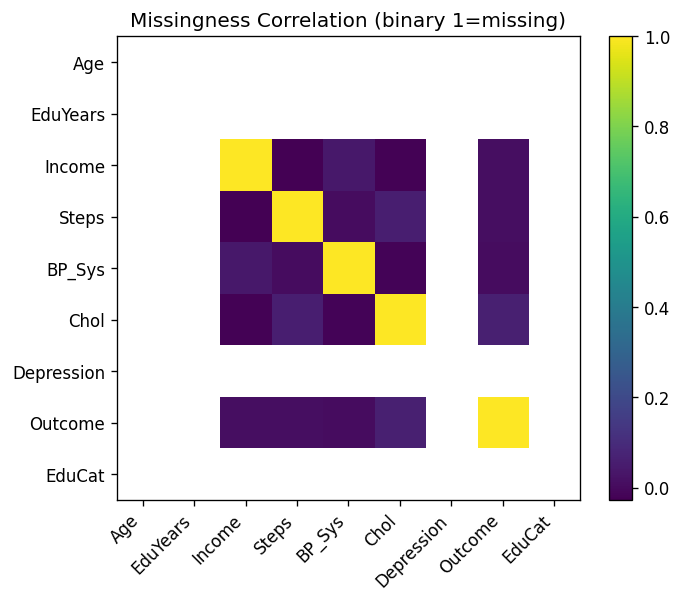

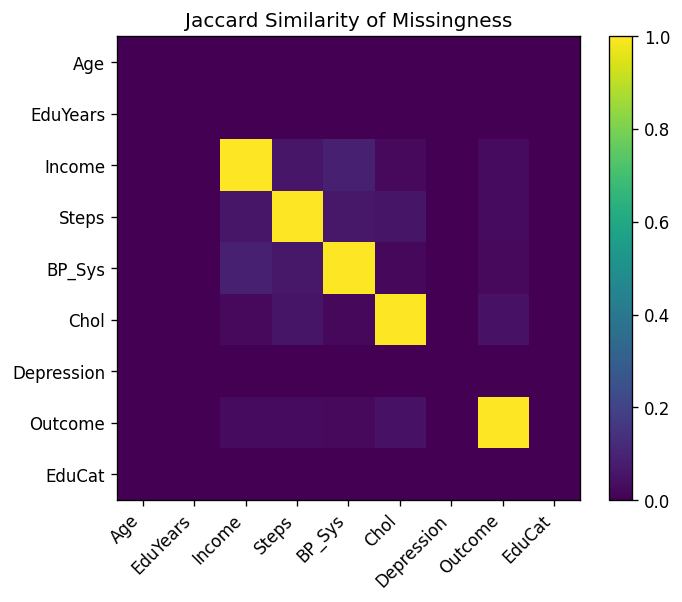

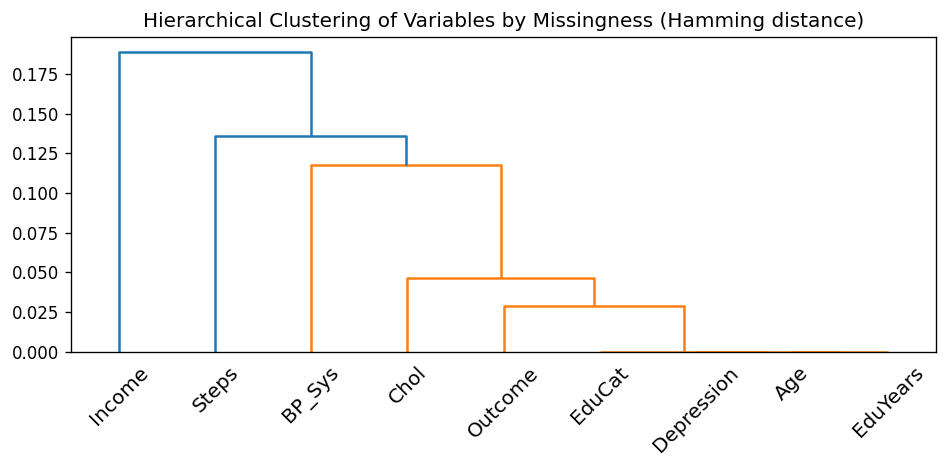

--- MNAR evidence metrics (synthetic example) ---
                                        Metric         Value
0    Welch t-test p (Outcome ~ Income missing)  8.778046e-01
1            KS-test p (Outcome distributions)  9.739371e-01
2              AUC (Outcome -> Income missing)  5.018234e-01
3       Chi-square p (Income missing ~ EduCat)  4.314838e-24
4         Cramér's V (Income missing ~ EduCat)  2.731098e-01
5  Mutual Information mean (EduCat -> missing)  1.466804e-02


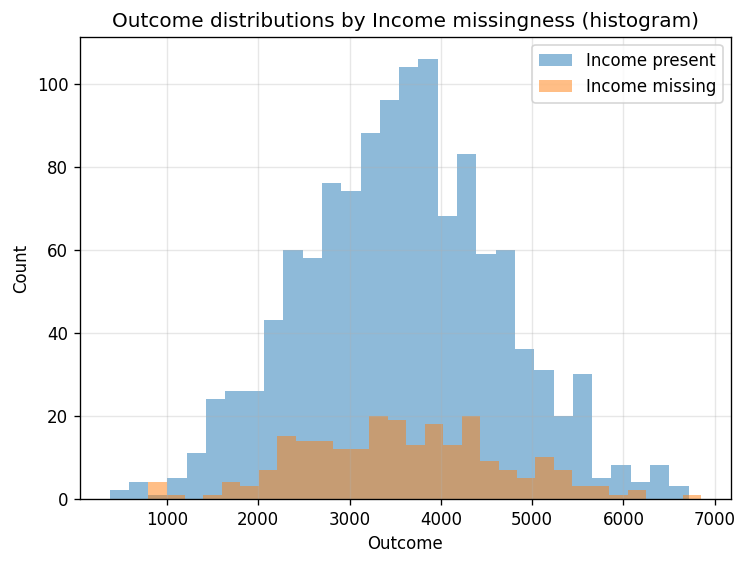

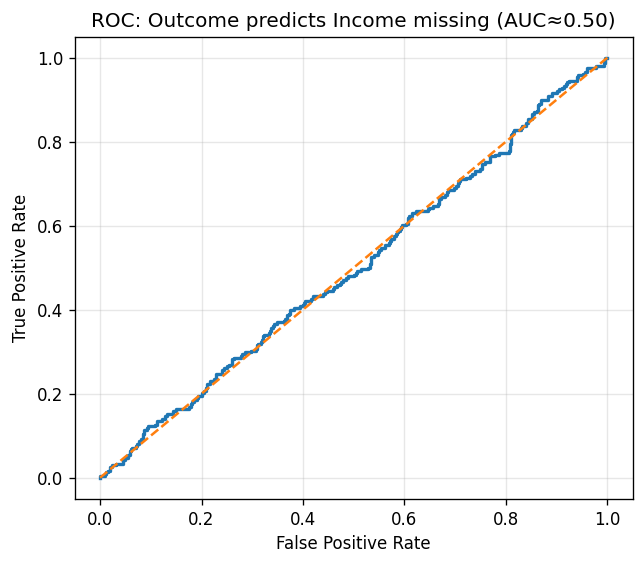

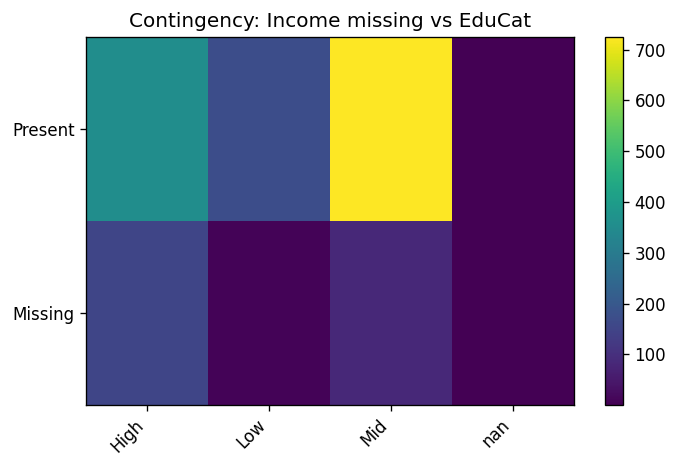

In [3]:
# Missingness Analysis Illustrations (Matplotlib-only, no seaborn)
# This script builds a synthetic dataset with MCAR, MAR, and MNAR patterns,
# then visualizes and quantifies missingness using several algorithms from the guide.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy.stats import ttest_ind, ks_2samp, chi2_contingency
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.feature_selection import mutual_info_classif

def display_dataframe_to_user(title, df):
    print(f"--- {title} ---")
    print(df)


# ------------------------ 1) Build a synthetic dataset ------------------------
rng = np.random.default_rng(123)

n = 1500

# Latent traits
age = rng.normal(40, 12, n).clip(18, 80)
edu_years = rng.normal(14, 2.5, n).clip(8, 22)
depr_score = rng.normal(50, 10, n)  # depression score
tech_affinity = rng.beta(2, 2, n) * 10

# Numeric vars
income = np.exp(rng.normal(np.log(4000 + 2500*(edu_years-12).clip(0)), 0.35, n))  # positively skewed
steps = np.maximum(0, rng.normal(6000 + 80*(age-40) * -1 + 200*(tech_affinity-5), 1500, n))  # daily steps
bp_sys = rng.normal(120 + 0.4*(age-40) - 0.015*steps/10, 10, n)  # systolic BP
chol = rng.normal(190 + 0.5*(age-40) - 0.02*steps/10, 25, n)

# Categorical target (education bands)
edu_cat = pd.cut(edu_years, bins=[0, 11, 15, 21], labels=["Low", "Mid", "High"]).astype(str)

# Continuous target (treatment outcome proxy)
outcome = 0.6*steps - 0.3*depr_score - 0.1*chol + rng.normal(0, 20, n)

df = pd.DataFrame({
    "Age": age,
    "EduYears": edu_years,
    "Income": income,
    "Steps": steps,
    "BP_Sys": bp_sys,
    "Chol": chol,
    "Depression": depr_score,
    "Outcome": outcome,
    "EduCat": edu_cat,
})

# ------------------ 2) Inject MCAR, MAR, MNAR missingness --------------------
M = pd.DataFrame(False, index=df.index, columns=df.columns)  # missingness mask (True=missing)

# MCAR: random dropout in Chol (5%)
mcar_mask = rng.random(n) < 0.05
df.loc[mcar_mask, "Chol"] = np.nan
M.loc[mcar_mask, "Chol"] = True

# MAR: missing BP_Sys depends on observable Age (older more missing) ~ sigmoid
p_mar = 1 / (1 + np.exp(-(df["Age"] - 50)/5)) * 0.4  # up to 40%
mar_mask = rng.random(n) < p_mar
df.loc[mar_mask, "BP_Sys"] = np.nan
M.loc[mar_mask, "BP_Sys"] = True

# MNAR: Income more likely missing when the income itself is high (unobserved driver)
# Use quantile-based probability
q = np.quantile(df["Income"], [0.5, 0.8, 0.95])
p_mnar = np.where(df["Income"] > q[2], 0.7,
          np.where(df["Income"] > q[1], 0.35,
          np.where(df["Income"] > q[0], 0.15, 0.05)))
mnar_mask = rng.random(n) < p_mnar
df.loc[mnar_mask, "Income"] = np.nan
M.loc[mnar_mask, "Income"] = True

# MAR: Steps missing more when Depression high and EduYears low (depends on observed vars)
p_steps = (np.clip((df["Depression"] - 50)/15, 0, 1) + np.clip((14 - df["EduYears"])/4, 0, 1)) * 0.25
steps_mar_mask = rng.random(n) < p_steps
df.loc[steps_mar_mask, "Steps"] = np.nan
M.loc[steps_mar_mask, "Steps"] = True

# Slight MCAR on Outcome (3%)
mcar_out = rng.random(n) < 0.03
df.loc[mcar_out, "Outcome"] = np.nan
M.loc[mcar_out, "Outcome"] = True

# ------------------ 3) Missing rates & heatmap -------------------------------
missing_rates = df.isna().mean().rename("MissingRate").sort_values(ascending=False)
missing_table = missing_rates.to_frame()

# Plot: Missingness heatmap (sampled rows to keep figure light)
sample_idx = np.arange(n)
rng.shuffle(sample_idx)
sample_idx = sample_idx[:300]
plt.figure(figsize=(8, 5), dpi=120)
plt.title("Missingness Heatmap (1=missing, 0=present) for 300 sampled rows")
plt.imshow(df.iloc[sample_idx].isna().astype(int).values, aspect="auto", interpolation="nearest")
plt.yticks([])
plt.xticks(range(df.shape[1]), df.columns, rotation=45, ha="right")
plt.colorbar()
plt.tight_layout()
plt.show()

# Display table to user
display_dataframe_to_user("Missing rates by column", missing_table.reset_index().rename(columns={"index":"Column"}))

# ------------------ 4) Co-missingness correlation & Jaccard ------------------
M_bin = df.isna().astype(int)

# Pearson correlation between missingness indicators
with np.errstate(invalid="ignore"):
    miss_corr = np.corrcoef(M_bin.T)

plt.figure(figsize=(6, 5), dpi=120)
plt.title("Missingness Correlation (binary 1=missing)")
plt.imshow(miss_corr, interpolation="nearest")
plt.xticks(range(df.shape[1]), df.columns, rotation=45, ha="right")
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

# Jaccard index matrix: J(A,B)=|A∩B| / |A∪B| for missingness sets
def jaccard_binary(mat):
    mat = mat.astype(bool).values
    d = mat.shape[1]
    J = np.zeros((d, d), float)
    for i in range(d):
        ai = mat[:, i]
        for j in range(d):
            aj = mat[:, j]
            inter = np.count_nonzero(ai & aj)
            union = np.count_nonzero(ai | aj)
            J[i, j] = inter / union if union > 0 else 0.0
    return J

J = jaccard_binary(M_bin)

plt.figure(figsize=(6, 5), dpi=120)
plt.title("Jaccard Similarity of Missingness")
plt.imshow(J, interpolation="nearest")
plt.xticks(range(df.shape[1]), df.columns, rotation=45, ha="right")
plt.yticks(range(df.shape[1]), df.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

# ------------------ 5) Hierarchical clustering with Hamming distance ----------
# Hamming distance between missingness vectors of columns
def hamming_dist_matrix(Mbin):
    A = Mbin.values.astype(int)
    d = A.shape[1]
    D = np.zeros((d, d), float)
    for i in range(d):
        for j in range(i+1, d):
            diff = np.abs(A[:, i] - A[:, j]).sum()
            D[i, j] = D[j, i] = diff / A.shape[0]
    return D

D = hamming_dist_matrix(M_bin)
# Convert to condensed distance for linkage
def square_to_condensed(S):
    d = S.shape[0]
    out = []
    for i in range(d-1):
        for j in range(i+1, d):
            out.append(S[i, j])
    return np.array(out, float)

Z = linkage(square_to_condensed(D), method="average")

plt.figure(figsize=(8, 4), dpi=120)
plt.title("Hierarchical Clustering of Variables by Missingness (Hamming distance)")
dendrogram(Z, labels=df.columns.to_list(), leaf_rotation=45)
plt.tight_layout()
plt.show()

# ------------------ 6) MNAR evidence tests (continuous target) ----------------
# We'll test if missingness of "Income" is associated with Outcome (continuous)
target = "Outcome"
feat = "Income"
mask_missing = df[feat].isna()
available = df[target].notna()

g1 = df.loc[mask_missing & available, target].values
g0 = df.loc[~mask_missing & available, target].values

# Welch's t-test and KS-test
t_stat, t_p = ttest_ind(g1, g0, equal_var=False, nan_policy="omit")
ks_stat, ks_p = ks_2samp(g1, g0, alternative="two-sided", mode="auto")

# Predictive AUC: can target predict missingness?
# Build small pipeline for logistic regression (target -> missingness)
# Only use rows where target is not missing
y_miss = mask_missing[available].astype(int).values
X_cont = df.loc[available, [target]].copy().values  # 1D continuous

if len(np.unique(y_miss)) > 1:
    lr = LogisticRegression(max_iter=200)
    lr.fit(X_cont, y_miss)
    prob = lr.predict_proba(X_cont)[:, 1]
    auc_income = roc_auc_score(y_miss, prob)
else:
    auc_income = np.nan

# ------------------ 7) MNAR evidence tests (categorical target) ---------------
# Is missingness of Income associated with EduCat?
cat_target = "EduCat"
tab = pd.crosstab(mask_missing, df[cat_target])
chi2, chi_p, dof, exp = chi2_contingency(tab)

# Cramér's V
n_obs = tab.to_numpy().sum()
phi2 = chi2 / n_obs
r, c = tab.shape
cramer_v = np.sqrt(phi2 / max(1, min(r-1, c-1)))

# Mutual information (categorical)
# Prepare arrays
miss_bin = mask_missing.astype(int).values
# One-hot encode EduCat and compute MI against miss_bin
enc = OneHotEncoder()
cat_ohe = enc.fit_transform(df[[cat_target]].fillna("NA"))
mi = mutual_info_classif(cat_ohe, miss_bin, discrete_features=True, random_state=123)

# ------------------ 8) Report key metrics to user -----------------------------
results_rows = [
    ("Welch t-test p (Outcome ~ Income missing)", float(t_p)),
    ("KS-test p (Outcome distributions)", float(ks_p)),
    ("AUC (Outcome -> Income missing)", float(auc_income)),
    ("Chi-square p (Income missing ~ EduCat)", float(chi_p)),
    ("Cramér's V (Income missing ~ EduCat)", float(cramer_v)),
    ("Mutual Information mean (EduCat -> missing)", float(np.mean(mi))),
]
results_df = pd.DataFrame(results_rows, columns=["Metric", "Value"])
display_dataframe_to_user("MNAR evidence metrics (synthetic example)", results_df)

# ------------------ 9) Visuals for tests -------------------------------------
# a) Outcome distributions by Income missing
plt.figure(figsize=(7, 5), dpi=120)
plt.title("Outcome distributions by Income missingness (histogram)")
bins = 30
g0v = g0[~np.isnan(g0)]
g1v = g1[~np.isnan(g1)]
# Plot two histograms with transparency (no explicit colors set)
plt.hist(g0v, bins=bins, alpha=0.5, label="Income present")
plt.hist(g1v, bins=bins, alpha=0.5, label="Income missing")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# b) ROC curve for Outcome -> Income missing
if not np.isnan(auc_income):
    from sklearn.metrics import roc_curve
    fpr, tpr, thr = roc_curve(y_miss, prob)
    plt.figure(figsize=(6, 5), dpi=120)
    plt.title(f"ROC: Outcome predicts Income missing (AUC≈{auc_income:.2f})")
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True, alpha=0.3)
    plt.show()

# c) Contingency heatmap (Income missing vs EduCat)
plt.figure(figsize=(6, 4), dpi=120)
plt.title("Contingency: Income missing vs EduCat")
plt.imshow(tab.values, aspect="auto", interpolation="nearest")
plt.xticks(range(tab.shape[1]), tab.columns, rotation=45, ha="right")
plt.yticks(range(tab.shape[0]), ["Present", "Missing"])
plt.colorbar()
plt.tight_layout()
plt.show()
